In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import requests

In [7]:
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = requests.get(url)
    print(resp.status_code)
    image = np.asarray(bytearray(resp.content), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    # return the image
    return image

200


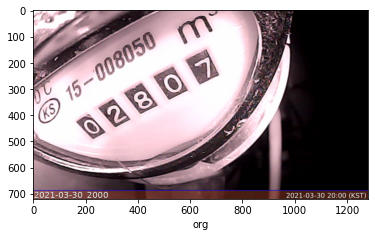

In [8]:
#img = cv2.imread('2021-01-08_0000.jpg',  cv2.IMREAD_GRAYSCALE)
img = url_to_image('http://54.180.106.144:8080/websensor')
plt.imshow(img)
plt.xlabel('org')
plt.show()

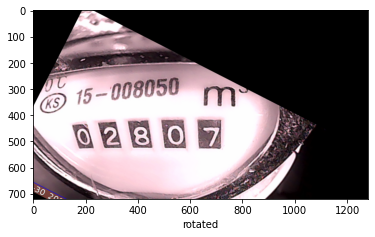

In [9]:
M = cv2.getRotationMatrix2D((130, 400), -27, 1.0)
img2 = cv2.warpAffine(img, M, (1280, 720))
plt.imshow(img2)
plt.xlabel('rotated')
plt.show()

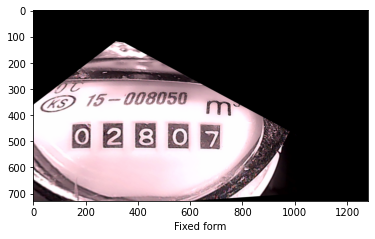

In [10]:
pts1 = np.float32([[138,432],[167,521],[708,407],[709,517]])
pts2 = np.float32([[140,430],[140,520],[706,430],[706,520]])
M = cv2.getPerspectiveTransform(pts1, pts2)
img3 = cv2.warpPerspective(img2, M, (1280, 728))
plt.imshow(img3)
plt.xlabel('Fixed form')
plt.show()

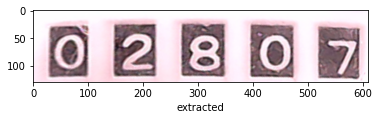

In [11]:
img4 = img3[406:536,120:730]
plt.imshow(img4)
plt.xlabel('extracted')
plt.show()